<a href="https://colab.research.google.com/github/mudabbirjafri/ML_Project/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "syedmjafri" 
os.environ['KAGGLE_KEY'] = "d30bb0472faa4934632c0057ebbfe683"
!kaggle competitions download -c ieee-fraud-detection
!mv test_identity.csv.zip testid.zip
!mv test_transaction.csv.zip testtrans.zip
!mv train_transaction.csv.zip traintrans.zip
!mv train_identity.csv.zip trainid.zip
!unzip testid.zip
!unzip testtrans.zip
!unzip trainid.zip
!unzip traintrans.zip
!rm testid.zip
!rm testtrans.zip
!rm trainid.zip
!rm traintrans.zip

 93% 49.0M/52.5M [00:01<00:00, 24.5MB/s]
100% 52.5M/52.5M [00:02<00:00, 27.3MB/s]
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 99.8MB/s]
 70% 33.0M/47.3M [00:00<00:00, 57.3MB/s]
100% 47.3M/47.3M [00:00<00:00, 80.6MB/s]
  0% 0.00/2.97M [00:00<?, ?B/s]
100% 2.97M/2.97M [00:00<00:00, 203MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 155MB/s]
Archive:  testid.zip
  inflating: test_identity.csv       
Archive:  testtrans.zip
  inflating: test_transaction.csv    
Archive:  trainid.zip
  inflating: train_identity.csv      
Archive:  traintrans.zip
  inflating: train_transaction.csv   


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import datasets, svm, tree, preprocessing, metrics
import sklearn.ensemble as ske
import os
import datetime

os.chdir('/content')
test_identity = pd.read_csv('test_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')

# DEFINED FUNCTIONS USED:

*   pre_processing_encorder






In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
LE = LabelEncoder()
LB = LabelBinarizer()


def pre_processing_encoder(df):
  counter_LB = 0
  counter_LE = 0
  column_names = df.dtypes[df.dtypes=='O'] # Take all the objects
  column_names = [x for x in column_names.index]
  unique_dict = {} # Create Dictionary
  for x in column_names: # Create a loop to only get only unique values
    unique_dict[x] = len((df[x].dropna().unique()))
  df[column_names]=df[column_names].fillna('NaN') # fill nans with "NaN"
  for x,y in unique_dict.items(): # Encode based on number of unique values
    if y <= 10:
      df[x]= LB.fit_transform(df[x])
      counter_LB+=1
    else:
      df[x] = LE.fit_transform(df[x])
      counter_LE+=1
  return print(f'Successfully Converted {counter_LB+counter_LE} columns\nLabel Binarizer:{counter_LB} \nLabel Encoder:{counter_LE}')

# From kernel https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
# WARNING! THIS CAN DAMAGE THE DATA 
def reduce_mem_usage2(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

# Initial Steps

In [0]:
# let's combine the data and work with the whole dataset
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

NameError: ignored

In [0]:
# Name of columns with objects
column_names = train.dtypes[train.dtypes=='O']
column_names = [x for x in column_names.index]
column_names.append('isFraud')
df_explore = train[column_names]
# Finding descriptions of the dataset
total_records_train = len(df_explore['isFraud'])
fraud_0_train = len(df_explore[df_explore['isFraud']==0])
fraud_1_train = len(df_explore[df_explore['isFraud']==1])

NameError: ignored

In [0]:
# dataframe with objects only
df_objects=df_explore.drop(columns=['isFraud'])

In [0]:
list_of_objects=[]
dict = {}
for columns1 in df_objects.columns:
  list_of_objects.append(df_objects[columns1].unique())

In [0]:
list_of_objects=[]
dict1 = {}
for columns1 in df_objects.columns:
   dict1[columns1]= len(df_objects[columns1].unique())

In [0]:
dict1

{'DeviceInfo': 1787,
 'DeviceType': 3,
 'M1': 3,
 'M2': 3,
 'M3': 3,
 'M4': 4,
 'M5': 3,
 'M6': 3,
 'M7': 3,
 'M8': 3,
 'M9': 3,
 'P_emaildomain': 60,
 'ProductCD': 5,
 'R_emaildomain': 61,
 'card4': 5,
 'card6': 5,
 'id_12': 3,
 'id_15': 4,
 'id_16': 3,
 'id_23': 4,
 'id_27': 3,
 'id_28': 3,
 'id_29': 3,
 'id_30': 76,
 'id_31': 131,
 'id_33': 261,
 'id_34': 5,
 'id_35': 3,
 'id_36': 3,
 'id_37': 3,
 'id_38': 3}

In [0]:
unique_list=[]
for x in range(len(list_of_objects)):
  for y in list_of_objects[x]:
    unique_list.append(y)
unique_list = set(unique_list)

# Exploration & VISUALIZATION

In [0]:
print(f'We have a total of {total_records_train} records with {fraud_1_train} fraud which is {round(fraud_1_train/total_records_train,6)*100}% for our training dataset.')
print(f'We have a total of {len(unique_list)} unique objects that are contained in {len(df_objects.columns)} columns.')
print(f'Our merged data set has a shape of {train.shape} for our train and {test.shape} for our test data set.')

We have a total of 590540 records with 20663 fraud which is 3.499% for our training dataset.
We have a total of 2332 unique objects that are contained in 31 columns.
Our merged data set has a shape of (590540, 434) for our train and (506691, 433) for our test data set.


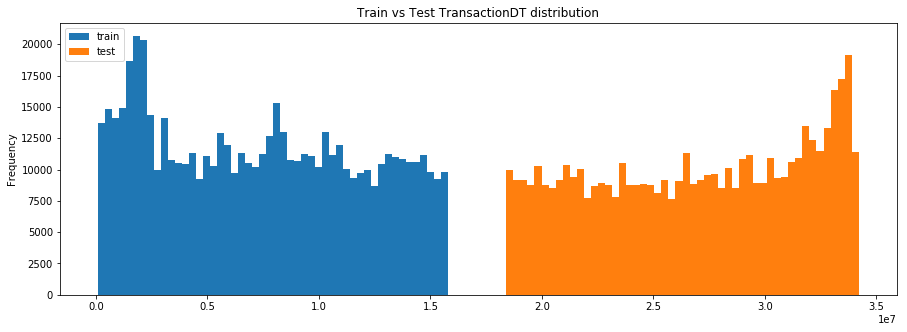

In [0]:
train_transaction['TransactionDT'].plot(kind='hist',
                                        figsize=(15, 5),
                                        label='train',
                                        bins=50,
                                        title='Train vs Test TransactionDT distribution')
test_transaction['TransactionDT'].plot(kind='hist',
                                       label='test',
                                       bins=50)
plt.legend()
plt.show()

VISUALIZATIONS - D FEATURE

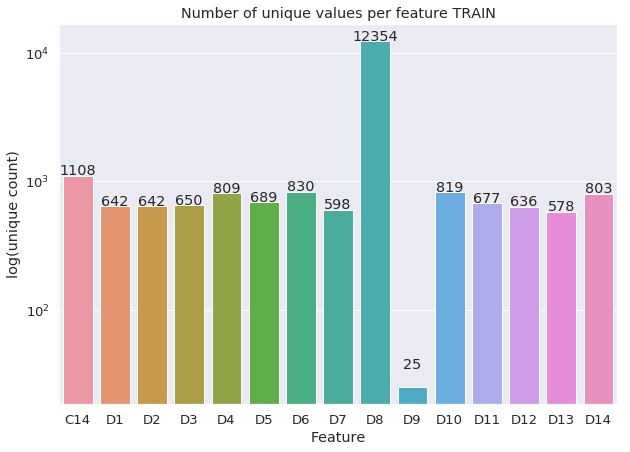

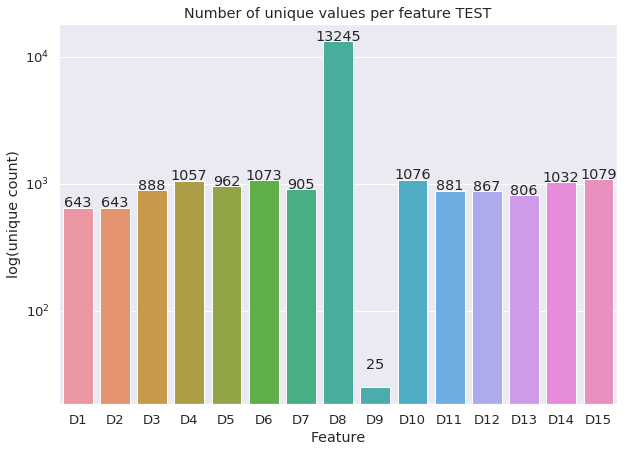

In [0]:
plt.figure(figsize=(10, 7))
d_features = list(train_transaction.columns[30:45])
uniques = [len(train_transaction[col].unique()) for col in d_features]
sns.set(font_scale=1.2)
ax = sns.barplot(d_features, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature TRAIN')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 
plt.figure(figsize=(10, 7))
d_features = list(test_transaction.columns[30:45])
uniques = [len(test_transaction[col].unique()) for col in d_features]
sns.set(font_scale=1.2)
ax = sns.barplot(d_features, uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature TEST')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

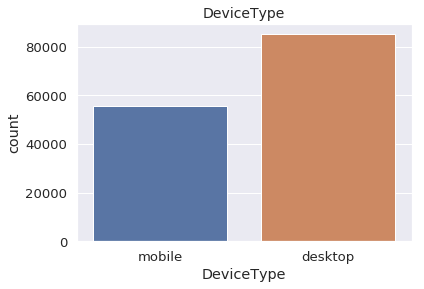

Unique Devices =  1786


Windows        47722
iOS Device     19782
MacOS          12573
Trident/7.0     7440
rv:11.0         1901
Name: DeviceInfo, dtype: int64

In [0]:
ax = sns.countplot(x="DeviceType", data=train_identity)
ax.set_title('DeviceType', fontsize=14)
plt.show()
print ("Unique Devices = ",train_identity['DeviceInfo'].nunique())
train_identity['DeviceInfo'].value_counts().head()

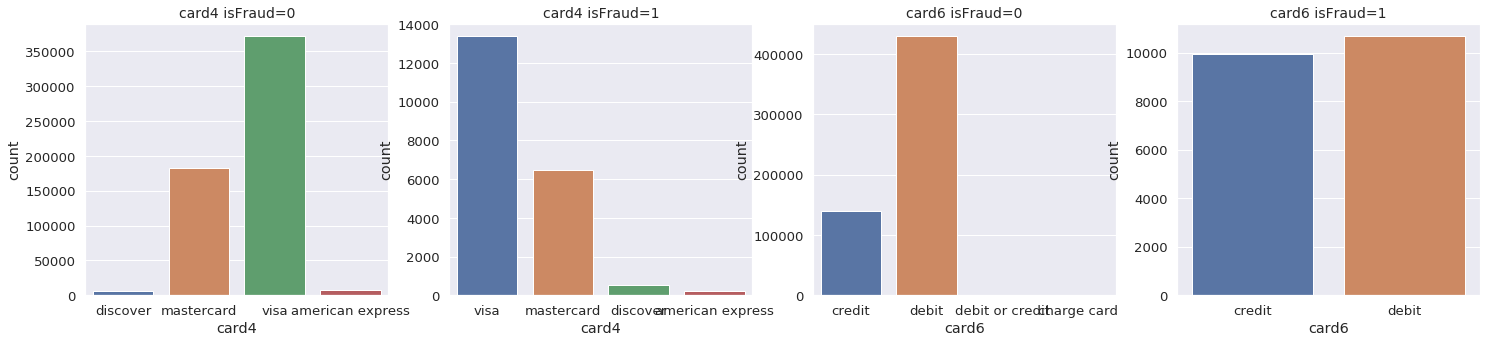

In [0]:
fig, ax = plt.subplots(1, 4, figsize=(25,5))

sns.countplot(x="card4", ax=ax[0], data=train_transaction.loc[train_transaction['isFraud'] == 0])
ax[0].set_title('card4 isFraud=0', fontsize=14)
sns.countplot(x="card4", ax=ax[1], data=train_transaction.loc[train_transaction['isFraud'] == 1])
ax[1].set_title('card4 isFraud=1', fontsize=14)
sns.countplot(x="card6", ax=ax[2], data=train_transaction.loc[train_transaction['isFraud'] == 0])
ax[2].set_title('card6 isFraud=0', fontsize=14)
sns.countplot(x="card6", ax=ax[3], data=train_transaction.loc[train_transaction['isFraud'] == 1])
ax[3].set_title('card6 isFraud=1', fontsize=14)
plt.show()

In [0]:
"emaildomain" in train_transaction.columns, "emaildomain" in train_identity.columns

(False, False)

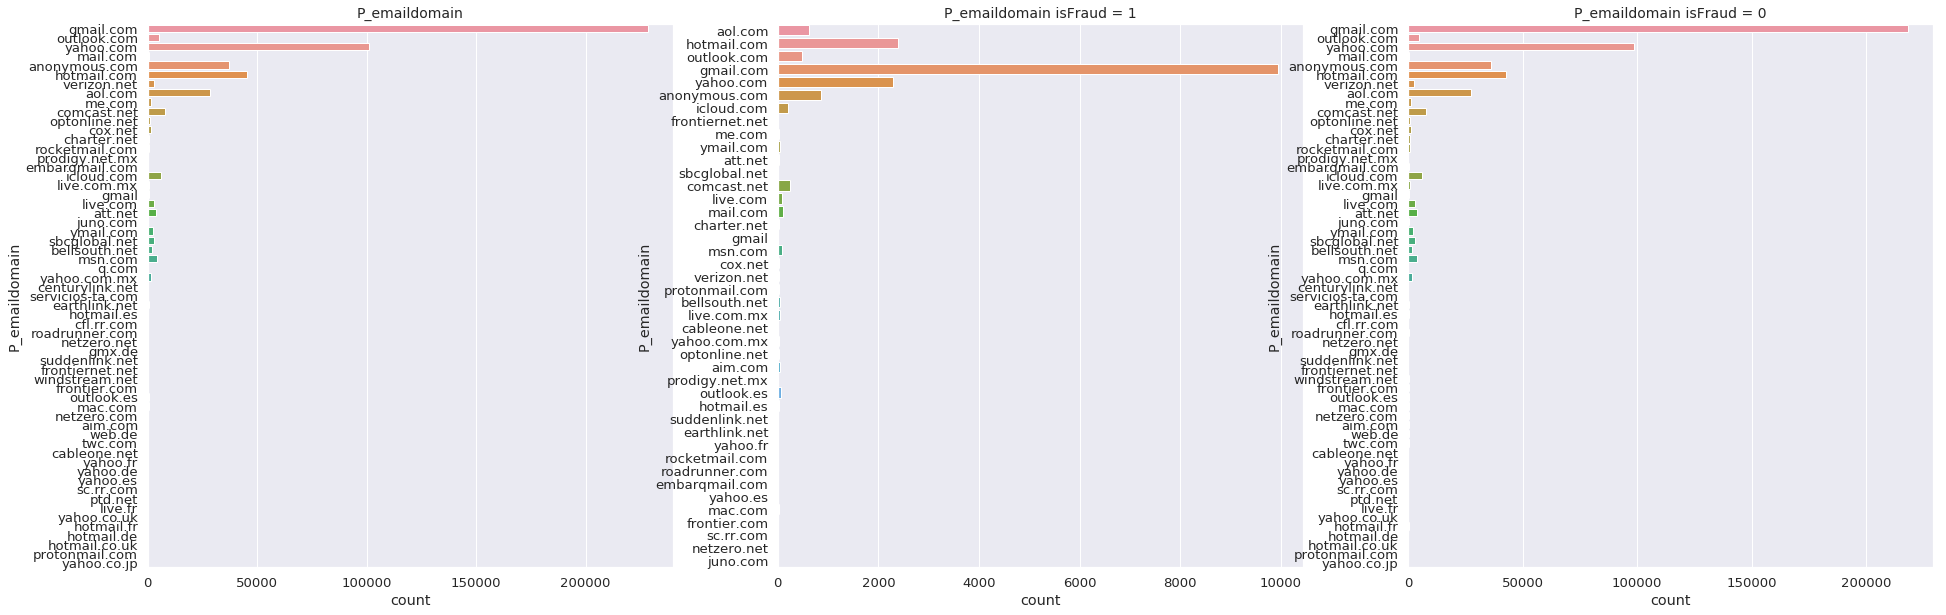

In [0]:
fig, ax = plt.subplots(1, 3, figsize=(32,10))

sns.countplot(y="P_emaildomain", ax=ax[0], data=train_transaction)
ax[0].set_title('P_emaildomain', fontsize=14)
sns.countplot(y="P_emaildomain", ax=ax[1], data=train_transaction.loc[train_transaction['isFraud'] == 1])
ax[1].set_title('P_emaildomain isFraud = 1', fontsize=14)
sns.countplot(y="P_emaildomain", ax=ax[2], data=train_transaction.loc[train_transaction['isFraud'] == 0])
ax[2].set_title('P_emaildomain isFraud = 0', fontsize=14)
plt.show()

In [0]:
# train_transaction[train_transaction['isFraud']==0]['P_emaildomain']

# Machine Learning

Models Used:
*   Logistic Regression
*   Principal Component Analysis
*   XGBoost



In [0]:
# X_train = reduce_mem_usage2(X_train)
# X_test = reduce_mem_usage2(X_test)

In [0]:
train['DeviceInfo'] = train['DeviceInfo'].fillna('NaN')
train['DeviceInfo']= LB.fit_transform(train['DeviceInfo'])


In [0]:
pre_processing_encoder(train)

Successfully Converted 31 columns
Label Binarizer:25 
Label Encoder:6


In [0]:
pre_processing_encoder(test)

Successfully Converted 31 columns
Label Binarizer:25 
Label Encoder:6


In [0]:
# from sklearn.model_selection import train_test_split
# # X = train.drop(columns=column_names).fillna(0)
# X = train.drop(columns=['isFraud']).fillna(0)
# # X = train.loc[:, train.columns != column_names]
# Y = train['isFraud']
# X_train, X_test, y_train, y_test = train_test_split(X,Y, stratify=Y, random_state=66, test_size=0.25)
# # random_state: to use the same random seed everytime we run the code .. If you remove, the splitted data will be different in each run.
# # in production, we will most like not use it
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# # modify the xtrain and y train
# logreg.fit(X_train, y_train)
# train_score = logreg.score(X_train, y_train)
# print('Training accuracy is ', train_score)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X = train.drop(columns=['isFraud']).fillna(0)
Y = train['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X,Y, stratify=Y, random_state=66, test_size=0.25)
# random_state: to use the same random seed everytime we run the code .. If you remove, the splitted data will be different in each run.
# in production, we will most like not use it
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# make a vector that will have a 0.1 for the default and 1 minus penality for defaults
penalty = 0.1
weight_1= (1-penalty)*y_train
weight_0= (1-y_train)*penalty
weights = weight_1+weight_0
logreg.fit(X_train, y_train, sample_weight = weights)
train_score = logreg.score(X_train, y_train)
print('Training accuracy is ', train_score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy is  0.9293866630541538


#Notes from Meeting

Used the function .memory_usage()
for  in range(1070):
df[df['deviceinfo]== unique_label[i]]=i
bring 30/40 
undersample to half for non fraud
oversampling for fraud
keras for deep learning model 
xgboost, catboost

 [imblearn documentation](https://imbalanced-learn.readthedocs.io/en/stable/index.html)
*   imblearn.over_sampling.SMOTE
*   imblearn.under_sampling.SMOTE
*   Research weights for random forest. Example) weights = [1,4]




In [0]:
test_score=logreg.score(X_test, y_test)
print('Test accuracy is ', test_score)

Test accuracy is  0.9292444203610255


Text(0.5, 0, 'Probability of Being 1')

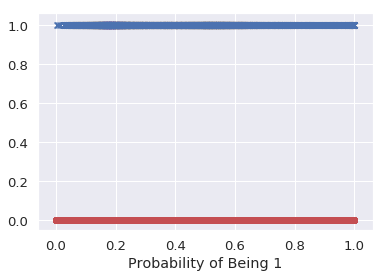

In [0]:
prob_test = logreg.predict_proba(X_test)
prob_test
plt.scatter(prob_test[y_test==1,1], y_test[y_test==1], marker="x")
plt.scatter(prob_test[y_test==0,1], y_test[y_test==0], c='r', marker="o")
plt.xlabel('Probability of Being 1')

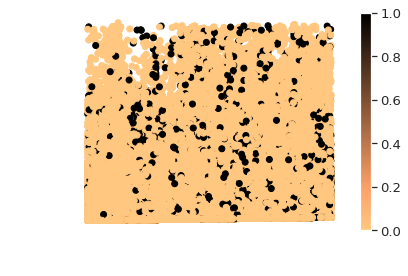

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
        
PCA_train_x = PCA(2).fit_transform(X_train)
plt.scatter(PCA_train_x[:, 0], PCA_train_x[:, 1], c=y_train, cmap="copper_r")
plt.axis('off')
plt.colorbar()
plt.show()

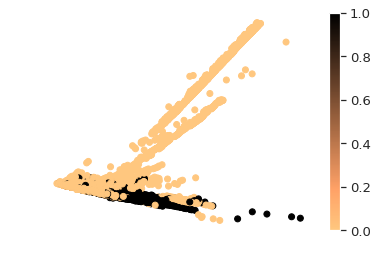

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)         
PCA_train_x = PCA(2).fit_transform(train_scaled)
plt.scatter(PCA_train_x[:, 0], PCA_train_x[:, 1], c=y_train, cmap="copper_r")
plt.axis('off')
plt.colorbar()
plt.show()

Feed PCA scaled data into a classifer, ada boost, xgboost, generate very short trys one or two steps. The first one learns and then it makes some error. Take the error and puts more weight on the error. If it pays to much attention error more. Aoc

In [0]:
# !pip install -q catboost
# !pip install -q xgboost

In [0]:
# from catboost import CatBoostClassifier, Pool, cv
# train_dataset = Pool(data=X_train)
# test_dataset = Pool(data=X_test)

In [0]:
# ITERATIONS = 800

# clf = CatBoostClassifier(iterations=ITERATIONS,
#                          learning_rate=0.1,
#                          depth=15,
#                          eval_metric='AUC',
#                          random_seed = 529,
#                          task_type="GPU",
#                          verbose=50)

# something = clf.fit(train_dataset) #, eval_set=valid_dataset)

In [0]:
# import xgboost as xgb
# from sklearn.model_selection import KFold, StratifiedKFold
# NFOLDS = 5
# kf = StratifiedKFold(n_splits=NFOLDS, shuffle=True, random_state=123)

# y_preds = np.zeros(X_test.shape[0])
# y_oof = np.zeros(X_train.shape[0])
# score = 0
  
# for fold, (tr_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
#     clf = xgb.XGBClassifier(
#         n_estimators=100,
#         max_depth=4,
#         learning_rate=0.05,
#         subsample=0.9,
#         colsample_bytree=0.9,
#         gamma = 0.2,
#         alpha = 4,
#         missing = -1,
#         tree_method='gpu_hist'
#     )
    
#     X_tr, X_vl = X_train.iloc[tr_idx, :], X_train.iloc[val_idx, :]
#     y_tr, y_vl = y_train.iloc[tr_idx], y_train.iloc[val_idx]
#     clf.fit(X_tr, y_tr)
#     y_pred_train = clf.predict_proba(X_vl)[:,1]
#     y_oof[val_idx] = y_pred_train
#     print("FOLD: ",fold,' AUC {}'.format(roc_auc_score(y_vl, y_pred_train)))
#     score += roc_auc_score(y_vl, y_pred_train) / NFOLDS
#     y_preds+= clf.predict_proba(X_test)[:,1] / NFOLDS
    
#     del X_tr, X_vl, y_tr, y_vl
#     gc.collect()
    
    
# print("\nMEAN AUC = {}".format(score))
# print("OOF AUC = {}".format(roc_auc_score(y_train, y_oof)))

In [0]:
# from sklearn.metrics import roc_curve
# from sklearn.metrics import auc
# # Compute fpr, tpr, thresholds and roc auc
# fpr, tpr, thresholds = roc_curve(y_true, y_score)
# roc_auc = auc(y_true, y_score)
# # Plot ROC curve
# plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate or (1 - Specifity)')
# plt.ylabel('True Positive Rate or (Sensitivity)')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")